In [ ]:
#!pip install PetThermoTools

Download the alphaMELTS for Python source code from here: https://magmasource.caltech.edu/gitlist/MELTS_Matlab.git/

For more instructions on installation etc. please see https://petthermotools.readthedocs.io/en/latest/installation.html#


In [24]:
import PetThermoTools as ptt
import numpy as np
import pandas as pd
import sys
sys.path.append(r"MELTS")

ptt.__version__

'0.2.3dev'

In [3]:
# used to suppress MELTS outputs in MacOS systems (run twice)
# don't run if you're using a Windows PC
import os
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

In [ ]:
sc = {'SiO2': 45,
      'TiO2': 0.4,
      'Al2O3': 3.5}

In [4]:
Results = ptt.AdiabaticDecompressionMelting(Model = "pMELTS", bulk = sc, #"KLB-1",
                                            Tp_C=1320, P_start_bar=30000, P_end_bar=2000, dp_bar = 333.33)

In [14]:
Results['Conditions']

,T_C,P_bar,h,s,v,dvdp,logfO2
0,1378.998934,30000.000000,-1.198331e+06,253.640839,30.605952,0.001461,-5.073821
1,1378.269801,29666.666667,-1.199351e+06,253.640839,30.613810,0.001460,-5.100492
2,1377.539596,29333.333333,-1.200372e+06,253.640839,30.621724,0.001460,-5.127448
3,1376.808275,29000.000000,-1.201393e+06,253.640839,30.629694,0.001460,-5.154696
4,1376.075789,28666.666667,-1.202414e+06,253.640839,30.637722,0.001460,-5.182240
...,...,...,...,...,...,...,...
80,1247.061625,3333.333333,-1.281694e+06,253.640839,32.955568,0.001093,-6.346136
81,1244.872225,3000.000000,-1.282794e+06,253.640839,33.006976,0.001084,-6.434463
82,1244.063972,2666.666667,-1.283894e+06,253.640839,33.028720,0.001083,-6.492428
83,1243.253113,2333.333333,-1.284996e+06,253.640839,33.050702,0.001081,-6.550888


In [15]:
StartingComp = Results['liquid1'].iloc[-10]

In [16]:
StartingComp

SiO2_Liq      53.386798
TiO2_Liq       0.713901
Al2O3_Liq     16.178272
Cr2O3_Liq      0.000000
Fe2O3_Liq      1.509184
FeO_Liq        4.743252
FeOt_Liq       6.109763
MnO_Liq        0.000000
MgO_Liq       10.209850
CaO_Liq       11.822180
Na2O_Liq       1.436564
K2O_Liq        0.000000
P2O5_Liq       0.000000
H2O_Liq        0.000000
CO2_Liq        0.000000
Fe3Fet_Liq     0.222260
Name: 75, dtype: float64

In [22]:
Xtal_results = ptt.isobaric_crystallisation(Model = "MELTSv1.0.2", 
                                            bulk = StartingComp,
                                            find_liquidus=True,
                                            P_bar = np.array([500,1000,2000,4000]),
                                            dt_C=2,
                                            T_end_C=900,
                                            Frac_solid=True,
                                            H2O_Liq = 0.1,
                                            label = "pressure")

  0%|          | 0/1 [00:00<?, ?it/s]

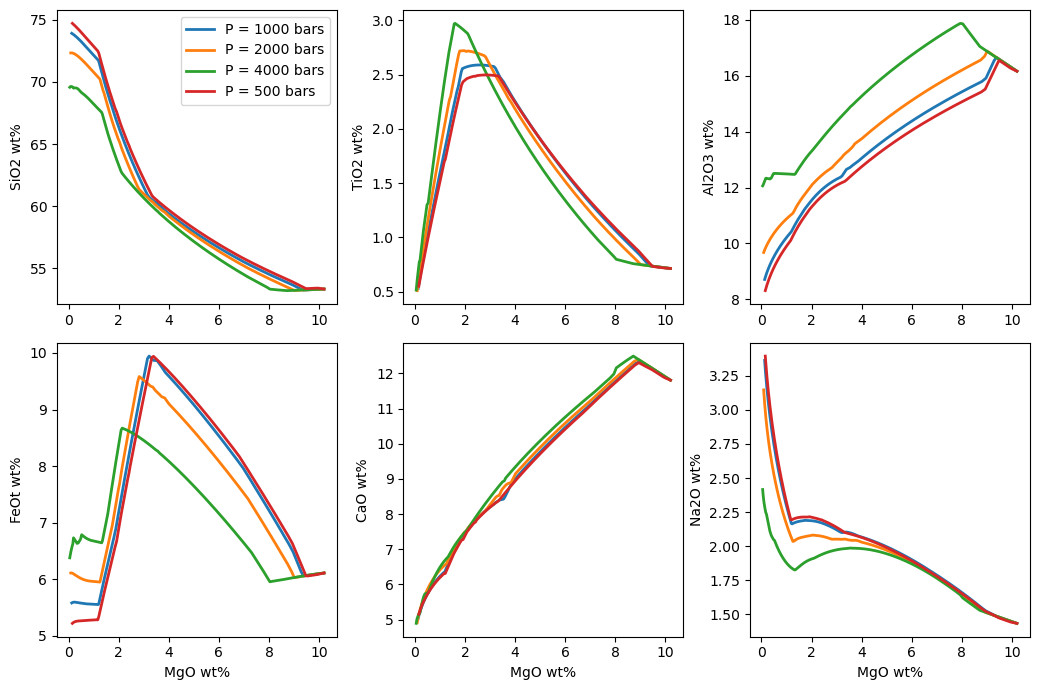

In [23]:
ptt.harker(Results = Xtal_results,label = "pressure")